In [ ]:
!pip install openai
!pip install --upgrade openai
import os
import openai
import pandas as pd
from IPython.display import display, Markdown


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 327.5/327.5 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.9 MB/s eta 0:00:00


In [ ]:
!pip install tensorflow
!pip install tf-slim
!pip install tensorflow-object-detection-api


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 577.4/577.4 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 777.1/777.1 kB 34.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.8 MB/s eta 0:00:00
  Created wheel for tensorflow-object-detection-api: filename=tensorflow_object_detection_api-0.1.1-py3-none-any.whl size=844487 sha256=fe5d90c17db463c35893e02e14c7de890878c88f45d086cec9eff28ec8d24237
  Stored in directory: /root/.cache/pip/wheels/8a/55/68/c084bc2cd93c41fd8f7e2ef9e6bbcb2c35a3e4b49e42044d02
Successfully built tensorflow-object-detection-api


In [ ]:
!pip install git+https://github.com/tensorflow/examples.git

  Cloning https://github.com/tensorflow/examples.git to /tmp/pip-req-build-ez1jbb9e
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/examples.git /tmp/pip-req-build-ez1jbb9e
  Resolved https://github.com/tensorflow/examples.git to commit fff4bcda7201645a1efaea4534403daf5fc03d42
  Preparing metadata (setup.py) ... done
  Created wheel for tensorflow-examples: filename=tensorflow_examples-0.1703207612.1461250479831370929614362828255168868146460245314-py3-none-any.whl size=301584 sha256=cce5141257e8fb17c5c262aa175c1fcce5dfcc0a66b1dffd70da115a4b5e1c8e
  Stored in directory: /tmp/pip-ephem-wheel-cache-ye0xq4gn/wheels/72/5f/d0/7fe769eaa229bf20101d11a357eb23c83c481bee2d7f710599
Successfully built tensorflow-examples


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow_examples.models.pix2pix import pix2pix
import numpy as np
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output
from scipy.stats import entropy
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow_examples.models.pix2pix import pix2pix
import numpy as np
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output
from scipy.stats import entropy
import os
import openai
import pandas as pd
from IPython.display import display, Markdown
from PIL import Image
from flask import Flask, request, jsonify ,render_template


Generative Adversarial Network


In [ ]:
OUTPUT_CHANNELS = 3

generator_g = pix2pix.unet_generator(OUTPUT_CHANNELS, norm_type='instancenorm')
generator_f = pix2pix.unet_generator(OUTPUT_CHANNELS, norm_type='instancenorm')

discriminator_x = pix2pix.discriminator(norm_type='instancenorm', target=False)
discriminator_y = pix2pix.discriminator(norm_type='instancenorm', target=False)

In [ ]:
generator_g_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
generator_f_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

discriminator_x_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_y_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

In [ ]:
checkpoint_path = "/content/drive/MyDrive/newcheckpoints"

ckpt = tf.train.Checkpoint(generator_g=generator_g,
                           generator_f=generator_f,
                           discriminator_x=discriminator_x,
                           discriminator_y=discriminator_y,
                           generator_g_optimizer=generator_g_optimizer,
                           generator_f_optimizer=generator_f_optimizer,
                           discriminator_x_optimizer=discriminator_x_optimizer,
                           discriminator_y_optimizer=discriminator_y_optimizer)

ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=20)
if ckpt_manager.latest_checkpoint:
  ckpt.restore(ckpt_manager.latest_checkpoint)
  print ('Latest checkpoint restored!!')

Latest checkpoint restored!!


Image array:
[[[[ 1.  1.  1.]
   [ 1.  1.  1.]
   [ 1.  1.  1.]
   ...
   [ 1.  1.  1.]
   [-1. -1. -1.]
   [ 1.  1.  1.]]

  [[ 1.  1.  1.]
   [ 1.  1.  1.]
   [ 1.  1.  1.]
   ...
   [ 1.  1.  1.]
   [-1. -1. -1.]
   [-1. -1. -1.]]

  [[ 1.  1.  1.]
   [ 1.  1.  1.]
   [ 1.  1.  1.]
   ...
   [ 1.  1.  1.]
   [ 1.  1.  1.]
   [-1. -1. -1.]]

  ...

  [[ 1.  1.  1.]
   [ 1.  1.  1.]
   [ 1.  1.  1.]
   ...
   [ 1.  1.  1.]
   [ 1.  1.  1.]
   [ 1.  1.  1.]]

  [[ 1.  1.  1.]
   [ 1.  1.  1.]
   [ 1.  1.  1.]
   ...
   [ 1.  1.  1.]
   [ 1.  1.  1.]
   [ 1.  1.  1.]]

  [[ 1.  1.  1.]
   [ 1.  1.  1.]
   [ 1.  1.  1.]
   ...
   [ 1.  1.  1.]
   [ 1.  1.  1.]
   [ 1.  1.  1.]]]]


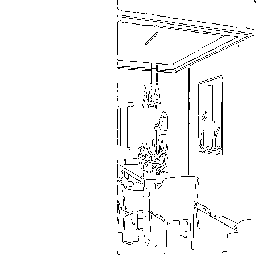

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def load_and_preprocess_image(image_path, img_size=(256, 256)):
    img = load_img(image_path, target_size=img_size)
    img = img_to_array(img)
    img = (img - 127.5) / 127.5
    img = np.expand_dims(img, axis=0)
    return img

def preprocess_images(images):
    images_resized = tf.image.resize(images, (299, 299))
    return preprocess_input(images_resized)


input_image_path = '/content/drive/MyDrive/train5000/sketches/4915_sketch.png'
input_image = load_and_preprocess_image(input_image_path)
print("Image array:")
print(input_image)
image_to_show = np.squeeze(input_image, axis=0)
image_to_show = ((image_to_show + 1) * 127.5).astype(np.uint8)
cv2_imshow(image_to_show)


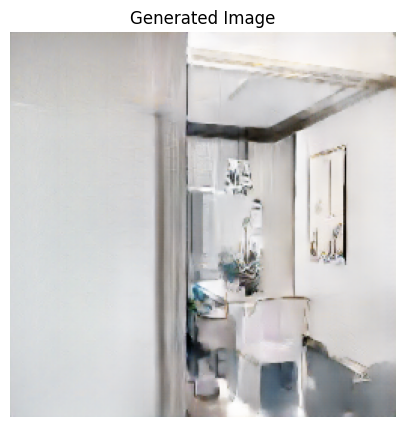

In [ ]:
fake_y = generator_g(input_image, training=False)
output_image = (fake_y.numpy()[0] * 127.5 + 127.5).astype(np.uint8)


plt.figure(figsize=(10, 5))
plt.imshow(output_image)
plt.title('Generated Image')
plt.axis('off')
plt.show()


Feature Fusion Network

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D
def feature_fusion_network(input_shape):
    input_layer = Input(shape=input_shape)
    conv1 = Conv2D(64, (3, 3), padding='same', activation='relu')(input_layer)
    conv2 = Conv2D(64, (3, 3), padding='same', activation='relu')(conv1)
    conv3 = Conv2D(64, (3, 3), padding='same', activation='relu')(conv2)
    output = Conv2D(3, (1, 1), padding='same', activation='sigmoid')(conv3)
    model = Model(inputs=input_layer, outputs=output)
    return model

def load_model_with_weights(model_path, input_shape):
    model = feature_fusion_network(input_shape)
    model.load_weights(model_path)
    return model


input_shape = (256, 256, 3)
weights_path = '/content/drive/MyDrive/ffnweights/weights_epoch_01.h5'
ffn_model = load_model_with_weights(weights_path, input_shape)


In [ ]:
def prepare_single_image(image_path, target_size=(256, 256)):
    image = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size)
    image = tf.keras.preprocessing.image.img_to_array(image)
    image /= 255.0
    image = np.expand_dims(image, axis=0)
    return image


1/1 [==============================] - 1s 589ms/step


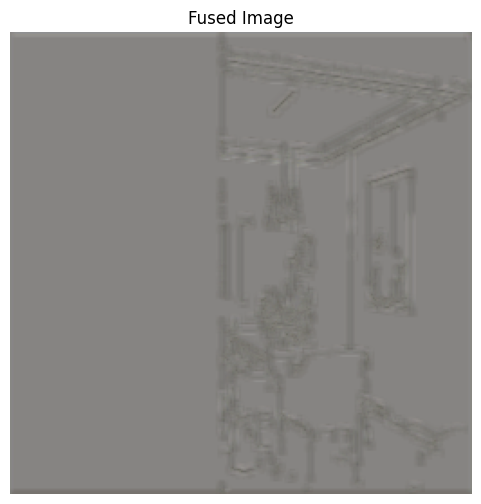

In [ ]:
def generate_fused_images(model, input_images):
    fused_images = model.predict(input_images)
    return fused_images

def prepare_image_from_array(image_array):
    image = image_array / 255.0
    image = np.expand_dims(image, axis=0)
    return image

prepared_image = prepare_image_from_array(image_to_show)
fused_image = generate_fused_images(ffn_model, prepared_image)


fused_image = np.clip(fused_image.squeeze(), 0, 1)
plt.figure(figsize=(6, 6))
plt.imshow(fused_image)
plt.title('Fused Image')
plt.axis('off')
plt.show()


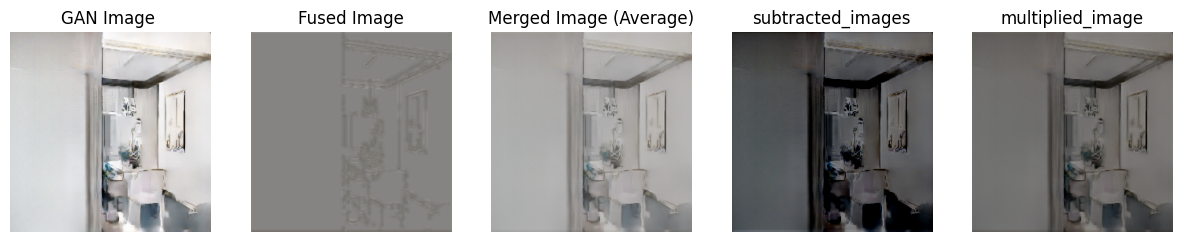

<Figure size 1500x500 with 0 Axes>

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
import os



def merge_images(image1, image2):
        image1 = image1.astype(np.float32)
    if image2.dtype != np.float32:
        image2 = image2.astype(np.float32)
    merged = (image1 + image2) / 2.0
    return np.clip(merged, 0, 1)


def subtract_images(image1, image2):
    if image1.dtype != np.float32:
        image1 = image1.astype(np.float32)
    if image2.dtype != np.float32:
        image2 = image2.astype(np.float32)
    merged = (image1 - image2)
    return np.clip(merged, 0, 1)

def multiply_images(image1, image2):
    if image1.dtype != np.float32:
        image1 = image1.astype(np.float32)
    if image2.dtype != np.float32:
        image2 = image2.astype(np.float32)
    merged = (image1 * image2)%255
    return np.clip(merged, 0, 1)  # Clip values to stay between 0 and 1


def visualize_images(images, titles, figsize=(15, 5)):
    plt.figure(figsize=figsize)
    for i, (image, title) in enumerate(zip(images, titles), 1):
        plt.subplot(1, len(images), i)
        plt.imshow(image)
        plt.title(title)
        plt.axis('off')
    plt.show()



generator_image = output_image
fused_image = fused_image
generator_image = generator_image / 255.0 if np.max(generator_image) > 1 else generator_image
fused_image = fused_image / 255.0 if np.max(fused_image) > 1 else fused_image

merged_image=merge_images( generator_image, fused_image)
merged_image = np.clip(merged_image.squeeze(), 0, 1)


subtracted_image=subtract_images( generator_image, fused_image)
subtracted_image = np.clip(subtracted_image.squeeze(), 0, 1)

multiplied_image=multiply_images( generator_image, fused_image)
multiplied_image = np.clip(multiplied_image.squeeze(), 0, 1)



visualize_images(
    [generator_image, fused_image, merged_image,subtracted_image,
     multiplied_image],
    ['GAN Image ', 'Fused Image', 'Merged Image (Average)','subtracted_images','multiplied_image']
)
visualize_images(
    [],
    []
)

YOLO

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import cv2
import numpy as np
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output
from scipy.stats import entropy
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from collections import defaultdict

In [ ]:
!wget -O ssd_mobilenet_v2_coco_2018_03_29.tar.gz "http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v2_coco_2018_03_29.tar.gz"
!tar -xvf ssd_mobilenet_v2_coco_2018_03_29.tar.gz




--2024-06-28 00:09:42--  http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v2_coco_2018_03_29.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.141.207, 173.194.210.207, 173.194.212.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.141.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 187925923 (179M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_coco_2018_03_29.tar.gz’

ssd_mobilenet_v2_co 100%[===================>] 179.22M   119MB/s    in 1.5s    

2024-06-28 00:09:43 (119 MB/s) - ‘ssd_mobilenet_v2_coco_2018_03_29.tar.gz’ saved [187925923/187925923]

ssd_mobilenet_v2_coco_2018_03_29/checkpoint
ssd_mobilenet_v2_coco_2018_03_29/model.ckpt.meta
ssd_mobilenet_v2_coco_2018_03_29/pipeline.config
ssd_mobilenet_v2_coco_2018_03_29/saved_model/saved_model.pb
ssd_mobilenet_v2_coco_2018_03_29/frozen_inference_graph.pb
ssd_mobilenet_v2_coco_2018_03_29/saved_model/
ssd_mobilenet_v2_coco_2018_0

In [ ]:
def load_frozen_model(model_file):
    with tf.io.gfile.GFile(model_file, "rb") as f:
        graph_def = tf.compat.v1.GraphDef()
        graph_def.ParseFromString(f.read())
    with tf.compat.v1.Graph().as_default() as graph:
        tf.import_graph_def(graph_def, name="")
    return graph

model_path = '/content/ssd_mobilenet_v2_coco_2018_03_29/frozen_inference_graph.pb'
detection_graph = load_frozen_model(model_path)

def load_label_map(label_map_path):
    label_map = {}
    with open(label_map_path, 'r') as f:
        for line in f:
            if "id:" in line:
                id = int(line.strip().split(' ')[-1])
            if "name:" in line:
                name = line.strip().split(' ')[-1].strip("'")
                label_map[id] = name
    return label_map

label_map_path = '/content/drive/MyDrive/mscoco_label_map.pbtxt'
labels = load_label_map(label_map_path)

In [ ]:
model_path = '/content/ssd_mobilenet_v2_coco_2018_03_29/frozen_inference_graph.pb'
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.compat.v1.GraphDef()
    with tf.io.gfile.GFile(model_path, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

bed: 1
chair: 1


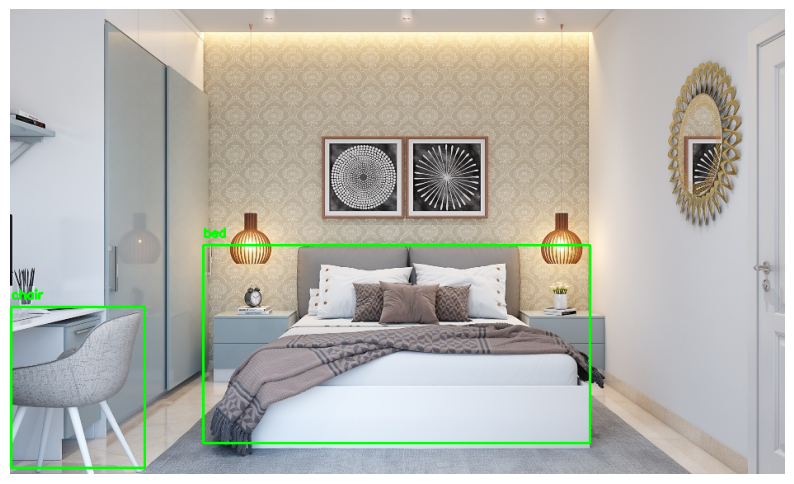

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from collections import defaultdict
import matplotlib.pyplot as plt

image_path = '/content/drive/MyDrive/testganffn/1542.jpg'
image = cv2.imread(image_path)

with detection_graph.as_default():
    with tf.compat.v1.Session(graph=detection_graph) as sess:
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        scores = detection_graph.get_tensor_by_name('detection_scores:0')
        classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')

        image_expanded = np.expand_dims(image, axis=0)
        (boxes, scores, classes, num_detections) = sess.run(
            [boxes, scores, classes, num_detections],
            feed_dict={image_tensor: image_expanded})


        detection_counts = defaultdict(int)
        for i in range(int(num_detections[0])):
            if scores[0][i] > 0.5:
                class_id = int(classes[0][i])
                detection_counts[labels.get(class_id, 'N/A')] += 1


detection_list = [{'class_name': class_name, 'count': count} for class_name, count in detection_counts.items()]


for detection in detection_list:
    print(f"{detection['class_name']}: {detection['count']}")


for i in range(int(num_detections[0])):
    if scores[0][i] > 0.5:
        box = boxes[0][i] * np.array([image.shape[0], image.shape[1], image.shape[0], image.shape[1]])
        (ymin, xmin, ymax, xmax) = box.astype(int)
        label = labels.get(int(classes[0][i]), 'N/A')
        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
        cv2.putText(image, label, (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)


image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis('off')
plt.show()


large language model

In [ ]:
from openai import OpenAI
client = OpenAI(
    api_key='',
  organization='',
  project='',
)

In [ ]:
from openai import OpenAI

client = OpenAI(api_key='')

stream = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[{"role": "user", "content": "Say this is a test"}],
    stream=True,
)

for chunk in stream:
    if chunk.choices[0].delta.content is not None:
        print(chunk.choices[0].delta.content, end="")

This is a test.

In [ ]:
from openai import OpenAI
OpenAI(api_key='')

completion = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "system", "content": "you will get tokens of interiour design items and tell what room in a house is it based on the items recieved. then state the items you recieved and some details about them"},
    {"role": "user", "content": f"{detection_list} "}
  ]
)

print(completion.choices[0].message)


ChatCompletionMessage(content='Based on the items of a bed and a chair, these tokens are most likely for a bedroom.\n\n1. Bed: A bed is a large piece of furniture used as a place to sleep or relax. Beds come in various sizes and styles, such as platform, canopy, upholstered, and more. They are essential for any bedroom, serving as the centerpiece and focal point of the room.\n\n2. Chair: A chair is a piece of furniture designed for seating one person. Chairs can come in different styles, such as armchairs, accent chairs, recliners, and more. They are often used in bedrooms as seating for reading, putting on shoes, or simply relaxing.\n\nThese items suggest a cozy and comfortable bedroom setting where one can sleep and relax. The bed provides a place for rest, while the chair offers a spot for additional seating or relaxation.', role='assistant', function_call=None, tool_calls=None)


In [ ]:
print(detection_list)

[{'class_name': 'bed', 'count': 1}, {'class_name': 'chair', 'count': 1}]


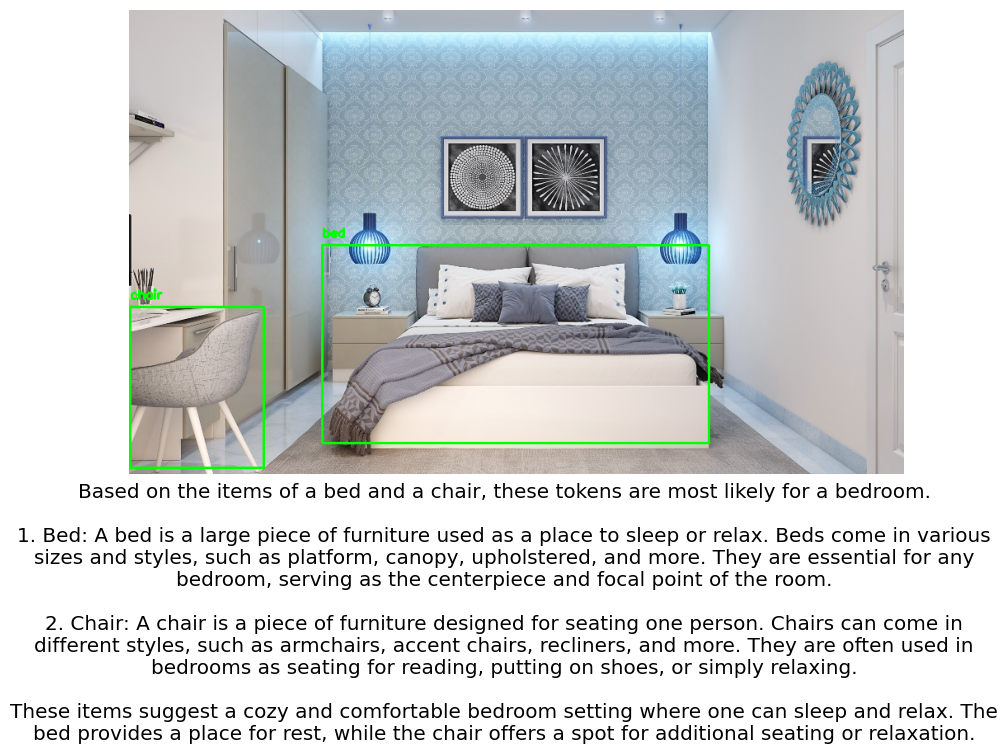

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


output_image = image_rgb

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(image)
ax.axis('off')

text_content=completion.choices[0].message.content

fig.text(0.5, 0, text_content, ha='center', wrap=True,fontsize='x-large')

plt.show()
